# Explicit & Implicit Finite Difference Modelling

## Explicit Examples

### 1. $u_{t} = u_{xx}$

Boundary Conditions

$u_{x}(0,t)=-1$

$u(2,t)=-10$

Initial Conditions

$u(x,0)=-10$

In [1]:
def explicitFD(L, J, Tf, M, α):
    '''
    Function explicitEx(L, J, Tf, M, α)
    Inputs:
    L - length of x domain
    J - number of x slices (J+1 calculation points or nodes)
    Tf - final solution time
    M - number of time slices
    α - thermal diffusivity of domain (k/(ρ*c))
    Notes - B.C.'s:
    - heat flux at x=0 of Q/A = -1*k, (k = 1 assumed), temp at x=L, held at -10
    - initial condition - all nodes start at -10 deg
    - Explicit finite difference algorithm used - see Tveito, Winther, Chp 4.1 - 4.3
    - user should ensure r = α*Tf*J/(M*L) is less than 0.5 for numerical stability
    - r value printed in plot title
    Returns:
    Matplotlib plot object - plot of temperature array
    H. Chesser - October 2016
    '''
    #imports
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Calculate mesh parameter
    dx = L/J
    dt = Tf/M
    r = α*dt/dx**2
    
    #Initialize solution array
    u = np.zeros((M+1,J+1)) #time = row index , x = column index
    
    #Apply initial condition
    u[0,:] = -10. #row 0, all columns
    
    #Apply B.C. at x=l
    u[:,-1] = -10. #all rows, last column

    #Recursion formula - Python for loop
    for m in range(0,M):
        u[m+1,1:J] = [r*u[m,j-1]+(1-2*r)*u[m,j]+r*u[m,j+1] for j in range(1,J)]# Python list comprehension across the row
        u[m+1,0] = u[m+1,1]+dx # B.C. at x=0
    
    #Make a surface plot of the result
    dfplot = plt.figure(figsize=(9,4.5))
    dfplot = plt.subplot(projection='3d')
    x = np.linspace(0., L, J+1)
    t = np.linspace(0., Tf, M+1)
    xv, tv = np.meshgrid(x, t)
    dfplot.plot_surface(xv, tv, u, cmap='jet')
    dfplot.set_xlabel('x')
    dfplot.set_ylabel('t')
    dfplot.set_zlabel(' Temp u(x,t)')
    dfplot.set_title("r = $\\alpha$ $\\frac{\Delta t}{\Delta x^2}$ ="+"{:.4f}".format(r))
    plt.show()

In [3]:
#%precision 4
#%matplotlib ipympl
import matplotlib.pyplot as plt

# Solution code
# to get the Greek letter, type \alpha, then hit Tab
α = 1.

#Discretization parameters
L = 2. # length of thermal path in x direction
J = 20 #slices along the x direction
dx = L/J
Tf = 2. #end time of simulation (start time is 0)
M = 2000 #time slices
dt = Tf/M
r = α*dt/dx**2
r

#For numerical stability r <= 0.5 - See Tveito, Winther, Chp 4.3

0.1000

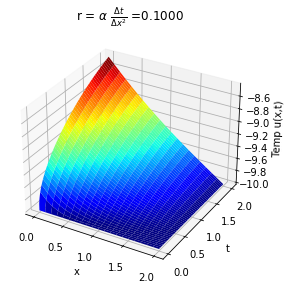

In [4]:
explicitFD(L, J, Tf, M, α)

### 2. $u_{t} = u_{xx}$

Boundary Conditions

$u(0,t)=0$

$u(1,t)=0$

Initial Conditions

$u(x,0)=sin14 \pi x$

In [5]:
def explicitFD(L, J, Tf, M, α):
    '''
    Function explicitEx(L, J, Tf, M, α)
    Inputs:
    L - length of x domain
    J - number of x slices (J+1 calculation points or nodes)
    Tf - final solution time
    M - number of time slices
    α - thermal diffusivity of domain (k/(ρ*c))
    Notes - B.C.'s:
    - heat flux at x=0 of Q/A = -1*k, (k = 1 assumed), temp at x=L, held at -10
    - initial condition - all nodes start at -10 deg
    - Explicit finite difference algorithm used - see Tveito, Winther, Chp 4.1 - 4.3
    - user should ensure r = α*Tf*J/(M*L) is less than 0.5 for numerical stability
    - r value printed in plot title
    Returns:
    Matplotlib plot object - plot of temperature array
    H. Chesser - October 2016
    '''
    #imports
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Calculate mesh parameter
    dx = L/J
    dt = Tf/M
    r = α*dt/dx**2
    
    #Initialize solution array
    u = np.zeros((M+1,J+1)) #time = row index , x = column index
        
    #Apply initial condition
    u[0,:] = [np.sin(np.pi*14*dx*i) for i in range (J+1)] #row 0, all columns
    
    #Apply B.C. at x=l
    #u[:,0] = 0. #all rows, first column
    #u[:,-1] = 0. #all rows, last column

    #Recursion formula - Python for loop
    for m in range(0,M):
        u[m+1,1:J] = [r*u[m,j-1]+(1-2*r)*u[m,j]+r*u[m,j+1] for j in range(1,J)]# Python list comprehension across the row
        
    
    #Make a surface plot of the result
    dfplot = plt.figure(figsize=(9,4.5))
    dfplot = plt.subplot(projection='3d')
    x = np.linspace(0., L, J+1)
    t = np.linspace(0., Tf, M+1)
    xv, tv = np.meshgrid(x, t)
    dfplot.plot_surface(xv, tv, u, cmap='jet')
    dfplot.set_xlabel('x')
    dfplot.set_ylabel('t')
    dfplot.set_zlabel(' Temp u(x,t)')
    dfplot.set_title("r = $\\alpha$ $\\frac{\Delta t}{\Delta x^2}$ ="+"{:.4f}".format(r))
    plt.show()

In [6]:
#%precision 4
#%matplotlib ipympl
import matplotlib.pyplot as plt

# Solution code
# to get the Greek letter, type \alpha, then hit Tab
α = 1.

#Discretization parameters
L = 1. # length of thermal path in x direction
J = 400 #slices along the x direction
dx = L/J
Tf = 0.003 #end time of simulation (start time is 0)
M = 2000 #time slices
dt = Tf/M
r = α*dt/dx**2



#For numerical stability r <= 0.5 - See Tveito, Winther, Chp 4.3

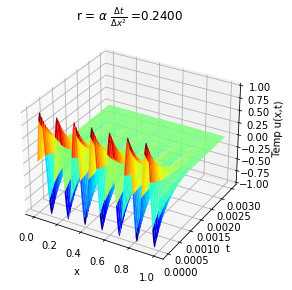

In [7]:
explicitFD(L, J, Tf, M, α)

### 3. $u_{t} = u_{xx}$

Boundary Conditions

$u_{x}(0,t)=0$

$u(1,t)=0$

Initial Conditions

$u(x,0)=x^{3}$

In [8]:
def explicitFD(L, J, Tf, M, α):
    '''
    Function explicitEx(L, J, Tf, M, α)
    Inputs:
    L - length of x domain
    J - number of x slices (J+1 calculation points or nodes)
    Tf - final solution time
    M - number of time slices
    α - thermal diffusivity of domain (k/(ρ*c))
    Notes - B.C.'s:
    - heat flux at x=0 of Q/A = -1*k, (k = 1 assumed), temp at x=L, held at -10
    - initial condition - all nodes start at -10 deg
    - Explicit finite difference algorithm used - see Tveito, Winther, Chp 4.1 - 4.3
    - user should ensure r = α*Tf*J/(M*L) is less than 0.5 for numerical stability
    - r value printed in plot title
    Returns:
    Matplotlib plot object - plot of temperature array
    H. Chesser - October 2016
    '''
    #imports
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Calculate mesh parameter
    dx = L/J
    dt = Tf/M
    r = α*dt/dx**2
    
    #Initialize solution array
    u = np.zeros((M+1,J+1)) #time = row index , x = column index
        
    #Apply initial condition
    u[0,:] = [((dx*i)**3) for i in range (J+1)] #row 0, all columns
    
    #Apply B.C. at x=l
    #u[:,0] = 0. #all rows, first column
    #u[:,-1] = 0. #all rows, last column

    #Recursion formula - Python for loop
    for m in range(0,M):
        u[m+1,1:J] = [r*u[m,j-1]+(1-2*r)*u[m,j]+r*u[m,j+1] for j in range(1,J)]# Python list comprehension across the row
        
    
    #Make a surface plot of the result
    dfplot = plt.figure(figsize=(9,4.5))
    dfplot = plt.subplot(projection='3d')
    x = np.linspace(0., L, J+1)
    t = np.linspace(0., Tf, M+1)
    xv, tv = np.meshgrid(x, t)
    dfplot.plot_surface(xv, tv, u, cmap='jet')
    dfplot.set_xlabel('x')
    dfplot.set_ylabel('t')
    dfplot.set_zlabel(' Temp u(x,t)')
    dfplot.set_title("r = $\\alpha$ $\\frac{\Delta t}{\Delta x^2}$ ="+"{:.4f}".format(r))
    plt.show()

In [9]:
#%precision 4
#%matplotlib ipympl
import matplotlib.pyplot as plt

# Solution code
# to get the Greek letter, type \alpha, then hit Tab
α = 1.

#Discretization parameters
L = 1. # length of thermal path in x direction
J = 20 #slices along the x direction
dx = L/J
Tf = .2 #end time of simulation (start time is 0)
M = 2000 #time slices
dt = Tf/M
r = α*dt/dx**2


#For numerical stability r <= 0.5 - See Tveito, Winther, Chp 4.3

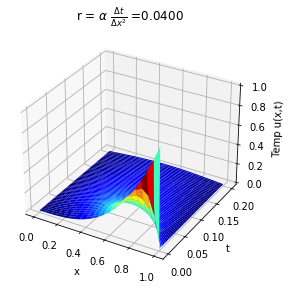

In [10]:
explicitFD(L, J, Tf, M, α)

## Implicit Examples

### 1. $u_{t} = u_{xx}$

Boundary Conditions

$u_{x}(0,t)=-1$

$u(2,t)=-10$

Initial Conditions

$u(x,0)=-10$

In [11]:
def implicitFD(L, J, Tf, M, α):
    '''
    Function implicitEx(L, J, Tf, M, α)
    Inputs:
    L - length of x domain
    J - number of x slices (J+1 calculation points or nodes)
    Tf - final solution time
    M - number of time slices
    α - thermal diffusivity of domain (k/(rho*c))
    Notes - B.C.'s:
    - heat flux at x=0 of Q = -1*k, (k = 1 assumed)
    - fixed temp at x=L of -10 deg
    - initial condition - all nodes start at -10 deg
    - Implicit finite difference algorithm used - see Tveito, Winther, Chp 4.4 - 4.5
    - r = α*Tf*J**2/(M*L) - for implicit algorithm unconditionally stable
    - r value printed in plot title for comparison with explicit output
    Returns:
    Matplotlib plot object - 3d surface of u(x,t) solution
    H. Chesser - October 2016
    '''
    #imports
    import numpy as np
    import scipy.sparse as spsp
    import scipy.sparse.linalg as spsplin
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Calculate mesh parameter
    dx = L/J
    dt = Tf/M
    r = α*dt/dx**2
    
    #Initialize solution array
    u = np.zeros((M+1,J+1)) #time = row index , x = column index
    
    #Apply initial condition
    u[0,:] = -10. #row 0, all columns
    
    #Apply B.C. at x=L
    u[:,-1] = -10. #last column, all rows
    
    #Set up matrix [I + rA] - Scipy Sparse matrices
    Adiag = (1.+2.*r)*np.ones(J)
    Asubs = -r*np.ones(J)
    Asuper = -r*np.ones(J)
    I_rA = spsp.spdiags([Asubs, Adiag, Asuper], [-1, 0, 1], J, J)
    I_rA = spsp.csr_matrix(I_rA)
    
    #adjust matrix for x=0 BC
    I_rA[0,0] = 1.
    I_rA[0,1] = -1.
    
    #adjust RHS for x=L BC
    b = np.zeros(J)
    b[J-1] = r*(-10)
    for m in range(0,M):
        c = u[m,:J] + b
        c[0] = dx # x=0 RHS
        u[m+1,:J] = spsplin.spsolve(I_rA, c)
        
    #Make a surface plot of the result
    dfplot = plt.figure(figsize=(9,4.5))
    dfplot = plt.subplot(projection='3d')
    
    x = np.linspace(0., L, J+1)
    t = np.linspace(0., Tf, M+1)
    xv, tv = np.meshgrid(x, t)
    
    dfplot.plot_surface(xv, tv, u, cmap='winter')
    dfplot.set_xlabel('x')
    dfplot.set_ylabel('t')
    dfplot.set_zlabel(' Temp u(x,t)')
    dfplot.set_title("r = $\\alpha$ $\\frac{\Delta t}{\Delta x^2}$ ="+"{:.4f}".format(r))
    plt.show()

In [13]:
#%precision 4
#%matplotlib ipympl
# Solution code
α = 1.
#Discretization parameters
L = 2. # length of thermal path in x direction
J = 40 #slices along the x direction
dx = L/J
Tf = 2. #time of simulation
M = 2000 #time slices
dt = Tf/M
r = α*dt/dx**2
r

0.4000

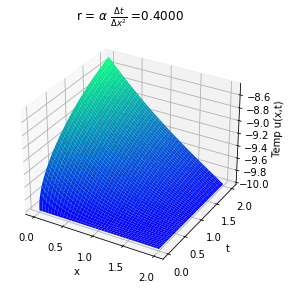

In [14]:
implicitFD(L, J, Tf, M, α)

### 2. $u_{t} = u_{xx}$

Boundary Conditions

$u(0,t)=0$

$u(1,t)=0$

Initial Conditions

$u(x,0)=sin14 \pi x$

In [15]:
def implicitFD(L, J, Tf, M, α):
    '''
    Function implicitEx(L, J, Tf, M, α)
    Inputs:
    L - length of x domain
    J - number of x slices (J+1 calculation points or nodes)
    Tf - final solution time
    M - number of time slices
    α - thermal diffusivity of domain (k/(rho*c))
    Notes - B.C.'s:
    - heat flux at x=0 of Q = -1*k, (k = 1 assumed)
    - fixed temp at x=L of -10 deg
    - initial condition - all nodes start at -10 deg
    - Implicit finite difference algorithm used - see Tveito, Winther, Chp 4.4 - 4.5
    - r = α*Tf*J**2/(M*L) - for implicit algorithm unconditionally stable
    - r value printed in plot title for comparison with explicit output
    Returns:
    Matplotlib plot object - 3d surface of u(x,t) solution
    H. Chesser - October 2016
    '''
    #imports
    import numpy as np
    import scipy.sparse as spsp
    import scipy.sparse.linalg as spsplin
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Calculate mesh parameter
    dx = L/J
    dt = Tf/M
    r = α*dt/dx**2
    
    #Initialize solution array
    u = np.zeros((M+1,J+1)) #time = row index , x = column index
    
    #Apply initial condition
    u[0,:] = [np.sin(np.pi*14*dx*i) for i in range (J+1)] #row 0, all columns
    
    #Apply B.C. at x=L
    #u[:,-1] = 0. #last column, all rows
    #u[:,0] = 0 #first column, all rows
    
    #Set up matrix [I + rA] - Scipy Sparse matrices
    Adiag = (1.+2.*r)*np.ones(J)
    Asubs = -r*np.ones(J)
    Asuper = -r*np.ones(J)
    I_rA = spsp.spdiags([Asubs, Adiag, Asuper], [-1, 0, 1], J, J)
    I_rA = spsp.csr_matrix(I_rA)
    
    #adjust matrix for x=0 BC
    #I_rA[0,0] = 1.
    #I_rA[0,1] = -1.
    
    #adjust RHS for x=L BC
    #b = np.zeros(J)
    #b[J-1] = r*(-10)
    for m in range(0,M):
        c = u[m,:J]
        #c[0] = dx # x=0 RHS
        u[m+1,:J] = spsplin.spsolve(I_rA, c)
        
    #Make a surface plot of the result
    dfplot = plt.figure(figsize=(9,4.5))
    dfplot = plt.subplot(projection='3d')
    
    x = np.linspace(0., L, J+1)
    t = np.linspace(0., Tf, M+1)
    xv, tv = np.meshgrid(x, t)
    
    dfplot.plot_surface(xv, tv, u, cmap='winter')
    dfplot.set_xlabel('x')
    dfplot.set_ylabel('t')
    dfplot.set_zlabel(' Temp u(x,t)')
    dfplot.set_title("r = $\\alpha$ $\\frac{\Delta t}{\Delta x^2}$ ="+"{:.4f}".format(r))
    plt.show()

In [16]:
#%precision 4
#%matplotlib ipympl

# Solution code
α = 1.

#Discretization parameters
L = 1. # length of thermal path in x direction
J = 400 #slices along the x direction
dx = L/J
Tf = 0.0025 #end time of simulation (start time is 0)
M = 2000 #time slices
dt = Tf/M
r = α*dt/dx**2


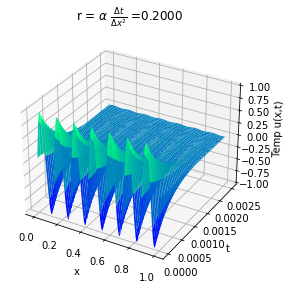

In [17]:
implicitFD(L, J, Tf, M, α)

### 3. $u_{t} = u_{xx}$

Boundary Conditions

$u_{x}(0,t)=0$

$u(1,t)=0$

Initial Conditions

$u(x,0)=x^{3}$

In [18]:
def implicitFD(L, J, Tf, M, α):
    '''
    Function implicitEx(L, J, Tf, M, α)
    Inputs:
    L - length of x domain
    J - number of x slices (J+1 calculation points or nodes)
    Tf - final solution time
    M - number of time slices
    α - thermal diffusivity of domain (k/(rho*c))
    Notes - B.C.'s:
    - heat flux at x=0 of Q = -1*k, (k = 1 assumed)
    - fixed temp at x=L of -10 deg
    - initial condition - all nodes start at -10 deg
    - Implicit finite difference algorithm used - see Tveito, Winther, Chp 4.4 - 4.5
    - r = α*Tf*J**2/(M*L) - for implicit algorithm unconditionally stable
    - r value printed in plot title for comparison with explicit output
    Returns:
    Matplotlib plot object - 3d surface of u(x,t) solution
    H. Chesser - October 2016
    '''
    #imports
    import numpy as np
    import scipy.sparse as spsp
    import scipy.sparse.linalg as spsplin
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Calculate mesh parameter
    dx = L/J
    dt = Tf/M
    r = α*dt/dx**2
    
    #Initialize solution array
    u = np.zeros((M+1,J+1)) #time = row index , x = column index
    
    #Apply initial condition
    u[0,:] = [((dx*i)**3) for i in range (J+1)] #row 0, all columns
    
    #Apply B.C. at x=L
    #u[:,-1] = 0. #last column, all rows
    #u[:,0] = 0 #first column, all rows
    
    #Set up matrix [I + rA] - Scipy Sparse matrices
    Adiag = (1.+2.*r)*np.ones(J)
    Asubs = -r*np.ones(J)
    Asuper = -r*np.ones(J)
    I_rA = spsp.spdiags([Asubs, Adiag, Asuper], [-1, 0, 1], J, J)
    I_rA = spsp.csr_matrix(I_rA)
    
    #adjust matrix for x=0 BC
    #I_rA[0,0] = 1.
    #I_rA[0,1] = -1.
    
    #adjust RHS for x=L BC
    #b = np.zeros(J)
    #b[J-1] = r*(-10)
    for m in range(0,M):
        c = u[m,:J]
        #c[0] = dx # x=0 RHS
        u[m+1,:J] = spsplin.spsolve(I_rA, c)
        
    #Make a surface plot of the result
    dfplot = plt.figure(figsize=(9,4.5))
    dfplot = plt.subplot(projection='3d')
    
    x = np.linspace(0., L, J+1)
    t = np.linspace(0., Tf, M+1)
    xv, tv = np.meshgrid(x, t)
    
    dfplot.plot_surface(xv, tv, u, cmap='winter')
    dfplot.set_xlabel('x')
    dfplot.set_ylabel('t')
    dfplot.set_zlabel(' Temp u(x,t)')
    dfplot.set_title("r = $\\alpha$ $\\frac{\Delta t}{\Delta x^2}$ ="+"{:.4f}".format(r))
    plt.show()

In [19]:
#%precision 4
#%matplotlib ipympl

# Solution code
α = 1.

#Discretization parameters
L = 1. # length of thermal path in x direction
J = 20 #slices along the x direction
dx = L/J
Tf = .2 #end time of simulation (start time is 0)
M = 2000 #time slices
dt = Tf/M
r = α*dt/dx**2

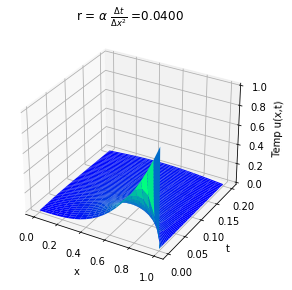

In [20]:
implicitFD(L, J, Tf, M, α)

PCB Example

A CubeSat PCB has an 8 layer design. The layers can be grouped as follows:

$6$ signal layers with (20 percent copper coverage)

$2$ power/ground layers (80 percent copper coverage)

remaining thickness FR4 glass epoxy

All copper layers are 1 oz Copper thickness

What is the effective thermal conductivity of this board?
For copper k = 390 W/mk , for fr-4 k = 0.23

In [22]:
k_Cu = 390 #W/mK thermal conductivity
k_FR4 = 0.23 #W/mK thermal conmductivity
t_sig = 0.035 #mm thickness of 10z copper
t_pow = t_sig
f_sig = 0.2 #coverage factor for sig layers
f_pow = 0.8 #coverage factor for pow layers
t = 1.58663 #mm total thickness of pcb

k_sig = k_Cu *f_sig*t_sig #equivalent total conductivity sig layer
print('conductivity of sig layer: ',k_sig) 

k_pow = k_Cu*f_pow*t_pow #equivalent total conductivity pow layer
print('conductivity of pow layer: ',k_pow)

k_FR4 = k_FR4*(t-6*t_sig-2*t_pow) #equivalent total conductivity fr-4 layer
print('conductivity of fr4 layer: ', k_FR4)

k_eff = (6*k_sig+2*k_pow+k_FR4)/t
k_eff, 'W/m-K'

conductivity of sig layer:  2.7300000000000004
conductivity of pow layer:  10.920000000000002
conductivity of fr4 layer:  0.3005249


(24.2782, 'W/m-K')

### 1. $u_{xx} = -f(x)$

Boundary Conditions

$u(0)=0$

$u(1)=0$

for 0<x<0.4: 
$f(x)=0$

for 0.4<x<0.6:
$f(x)=1$

for 0.6<x<1:
$f(x)=1$


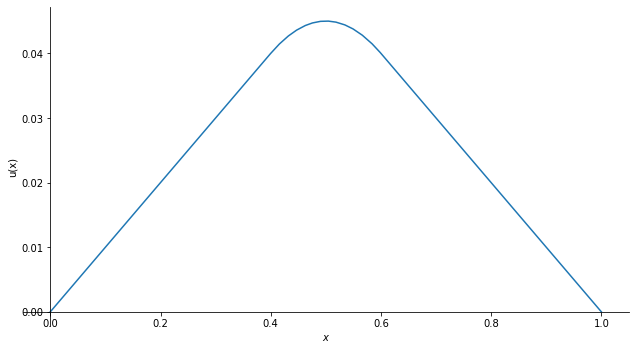

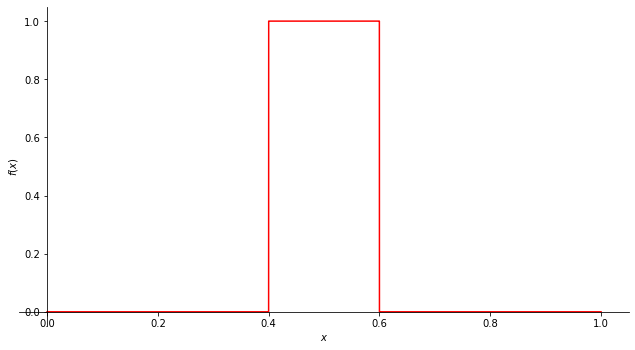

In [4]:
import sympy.plotting as symplt
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()
plt.rcParams['figure.figsize'] = 9,5
x = sym.Symbol('x', real=True, positive=True)
ux = sym.Piecewise((0.1*x, x<0.4), (0.1*x-0.5*(x-0.4)**2, sym.And(x>=0.4,x<0.6)),(0.1-0.1*x, True))
fx = sym.Piecewise((0, x<0.4), (1, sym.And(x>=0.4,x<0.6)),(0, True)) 
symplt.plot(ux, (x, 0., 1.), ylabel='u(x)') 
symplt.plot(fx, (x, 0., 1.), line_color='red')